In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings #does not show any warning
warnings.filterwarnings('ignore')

In [2]:
file= pd.read_csv('~/Documents/first_week/labs/lab-customer-analysis-round-4/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [15]:
file.head()
file.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [29]:
#lower case
file.columns=file.columns.str.lower()
#remove withespaces
file.columns= file.columns.str.replace(" ","_")

In [30]:
#create two diff dataframes: one with numericals var and the other with categoricals.
numerical = file._get_numeric_data()

In [31]:
categorical= file.select_dtypes(['object'])

In [32]:
categorical.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [33]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Data Visualisation 

In [21]:
## import the libraries for dv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #all the plots will stack to thge notebook

UsageError: unrecognized arguments: #all the plots will stack to thge notebook


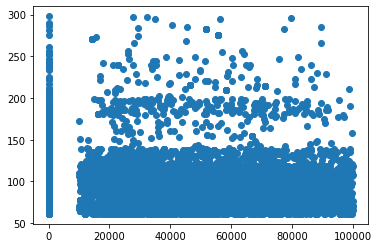

In [41]:
plt.scatter(x=file['income'], y=file['monthly_premium_auto'])
plt.show()

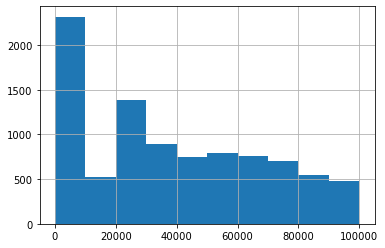

In [38]:
# distribution of income
file['income'].hist()
plt.show()

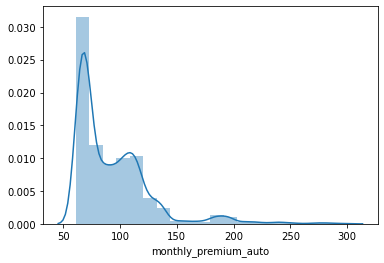

In [40]:
sns.distplot(file['monthly_premium_auto'], bins=20)
plt.show()

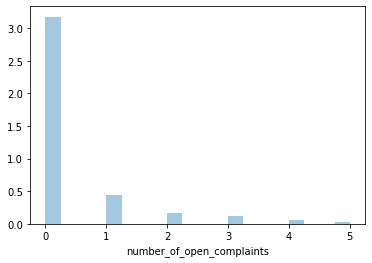

In [46]:
sns.distplot(file['number_of_open_complaints'], bins=20)
plt.show()

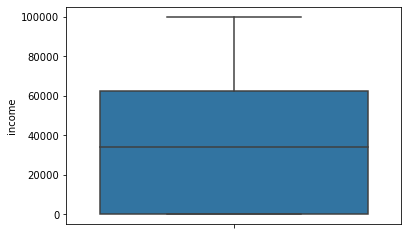

In [42]:
sns.boxplot(y="income", data=file)
plt.show()

### Correlation

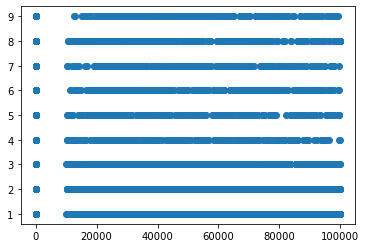

In [45]:
#review correlation of two selected variables 
plt.scatter(x=file['income'], y=file['number_of_policies'])
plt.show()

In [47]:
#bring in the scipy library - The scientific python library
# an open-source Python library which is used to solve scientific and mathematical problems. 
# It is built on the NumPy extension and allows the user to manipulate and visualize data.
import scipy.stats as stats

In [49]:
x=file['income']
y=file['total_claim_amount']
stats.pearsonr(x, y) # gives correlation coefficient and the p value 

(-0.35525431739719254, 7.004495851142546e-270)

In [50]:
#create a correlation matrix of numerical columns 

correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


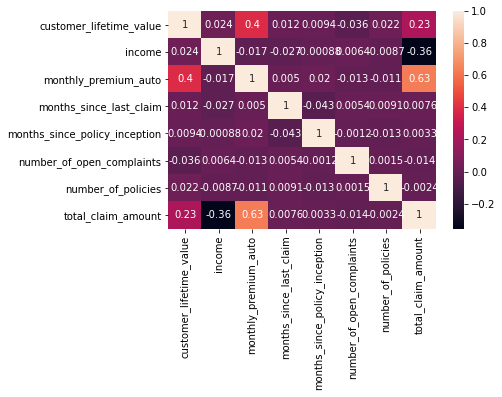

In [51]:
#create a heatmap 
sns.heatmap(correlations_matrix, annot=True)
plt.show()